In [320]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, f_oneway
from factor_analyzer import FactorAnalyzer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor

In [321]:
housing = pd.read_csv("/home/darkstar/Documents/pg-dbda/module7_statistics/Daywise Study Material/datasets/housing_in_metro_cities.csv")
housing

,Price,Area,Location,City,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,30000000,3340,JP Nagar Phase 1,Bangalore,4,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
1,7888000,1045,Dasarahalli on Tumkur Road,Bangalore,2,0,0,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,4866000,1179,Kannur on Thanisandra Main Road,Bangalore,2,0,0,1,1,1,...,1,0,0,0,0,0,0,0,0,0
3,8358000,1675,Doddanekundi,Bangalore,3,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,6845000,1670,Kengeri,Bangalore,3,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32958,14500000,1180,Mira Road East,Mumbai,2,0,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
32959,14500000,530,Naigaon East,Mumbai,1,1,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
32960,4100000,700,Shirgaon,Mumbai,1,0,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
32961,2750000,995,Mira Road East,Mumbai,2,0,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9


In [322]:
factor_levels = {}
df = housing.iloc[:,3:50]
for column in df.columns:
    factor_levels[column] = df[column].value_counts().index.tolist()

# Print the factor levels
for column, levels in factor_levels.items():
    print(f"{column}: {levels}")


City: ['Mumbai', 'Kolkata', 'Bangalore', 'Chennai', 'Delhi', 'Hyderabad']
No. of Bedrooms: [2, 3, 1, 4, 5, 6, 7, 8, 9]
Resale: [0, 1]
MaintenanceStaff: [9, 0, 1]
Gymnasium: [9, 1, 0]
SwimmingPool: [9, 0, 1]
LandscapedGardens: [9, 0, 1]
JoggingTrack: [9, 0, 1]
RainWaterHarvesting: [9, 0, 1]
IndoorGames: [9, 0, 1]
ShoppingMall: [9, 0, 1]
Intercom: [9, 0, 1]
SportsFacility: [9, 0, 1]
ATM: [9, 0, 1]
ClubHouse: [9, 0, 1]
School: [9, 0, 1]
24X7Security: [9, 0, 1]
PowerBackup: [9, 1, 0]
CarParking: [9, 0, 1]
StaffQuarter: [9, 0, 1]
Cafeteria: [9, 0, 1]
MultipurposeRoom: [9, 0, 1]
Hospital: [9, 0, 1]
WashingMachine: [9, 0, 1]
Gasconnection: [9, 0, 1]
AC: [9, 0, 1]
Wifi: [9, 0, 1]
Children'splayarea: [9, 1, 0]
LiftAvailable: [9, 1, 0]
BED: [9, 0, 1]
VaastuCompliant: [9, 0, 1]
Microwave: [9, 0, 1]
GolfCourse: [9, 0, 1]
TV: [9, 0, 1]
DiningTable: [9, 0, 1]
Sofa: [9, 0, 1]
Wardrobe: [9, 0, 1]
Refrigerator: [9, 0, 1]


In [323]:
min_price = min(housing['Price'])
max_price = max(housing['Price'])

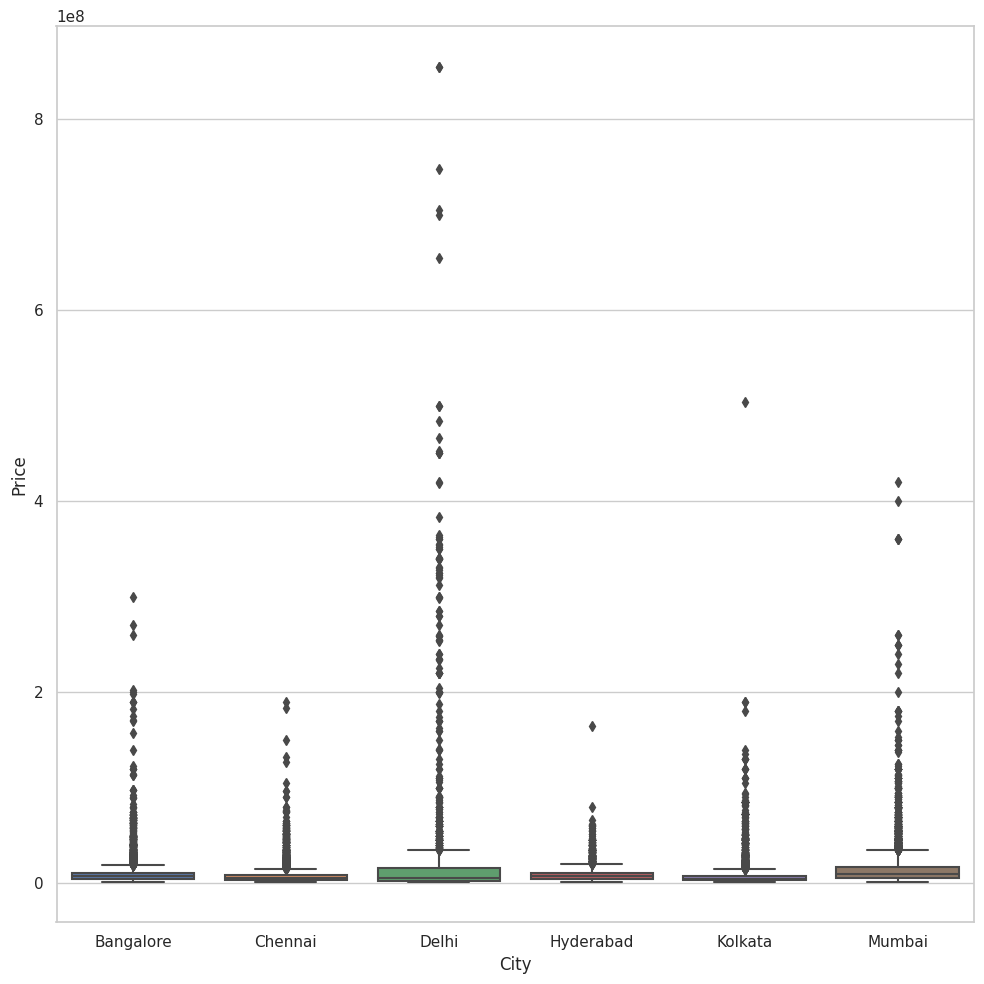

In [324]:
plt.figure(figsize=(10,10))
sns.set(style='whitegrid')
sns.boxplot(data=housing, x='City', y='Price')
plt.show() 

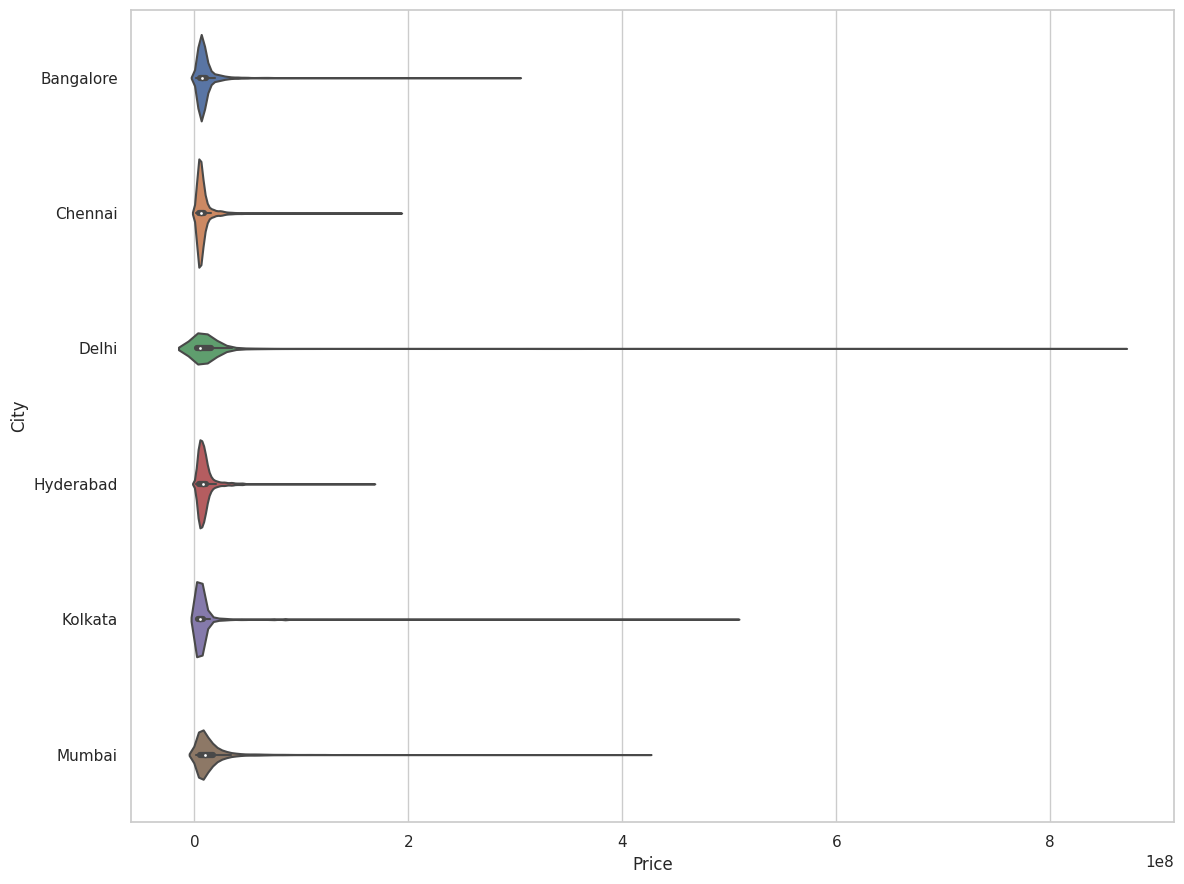

In [325]:
plt.figure(figsize=(12, 9))
sns.set(style='whitegrid')
sns.violinplot(data=housing, y='City', x='Price')
plt.show()

In [326]:
num_housing = housing.select_dtypes(include=['float64', 'int64'])
num_housing
essential = num_housing.iloc[:,:4]
essential

,Price,Area,No. of Bedrooms,Resale
0,30000000,3340,4,0
1,7888000,1045,2,0
2,4866000,1179,2,0
3,8358000,1675,3,0
4,6845000,1670,3,0
...,...,...,...,...
32958,14500000,1180,2,0
32959,14500000,530,1,1
32960,4100000,700,1,0
32961,2750000,995,2,0


                    Price      Area  No. of Bedrooms    Resale
Price            1.000000  0.295062         0.163689  0.057410
Area             0.295062  1.000000         0.706007 -0.057304
No. of Bedrooms  0.163689  0.706007         1.000000 -0.081430
Resale           0.057410 -0.057304        -0.081430  1.000000


<Axes: >

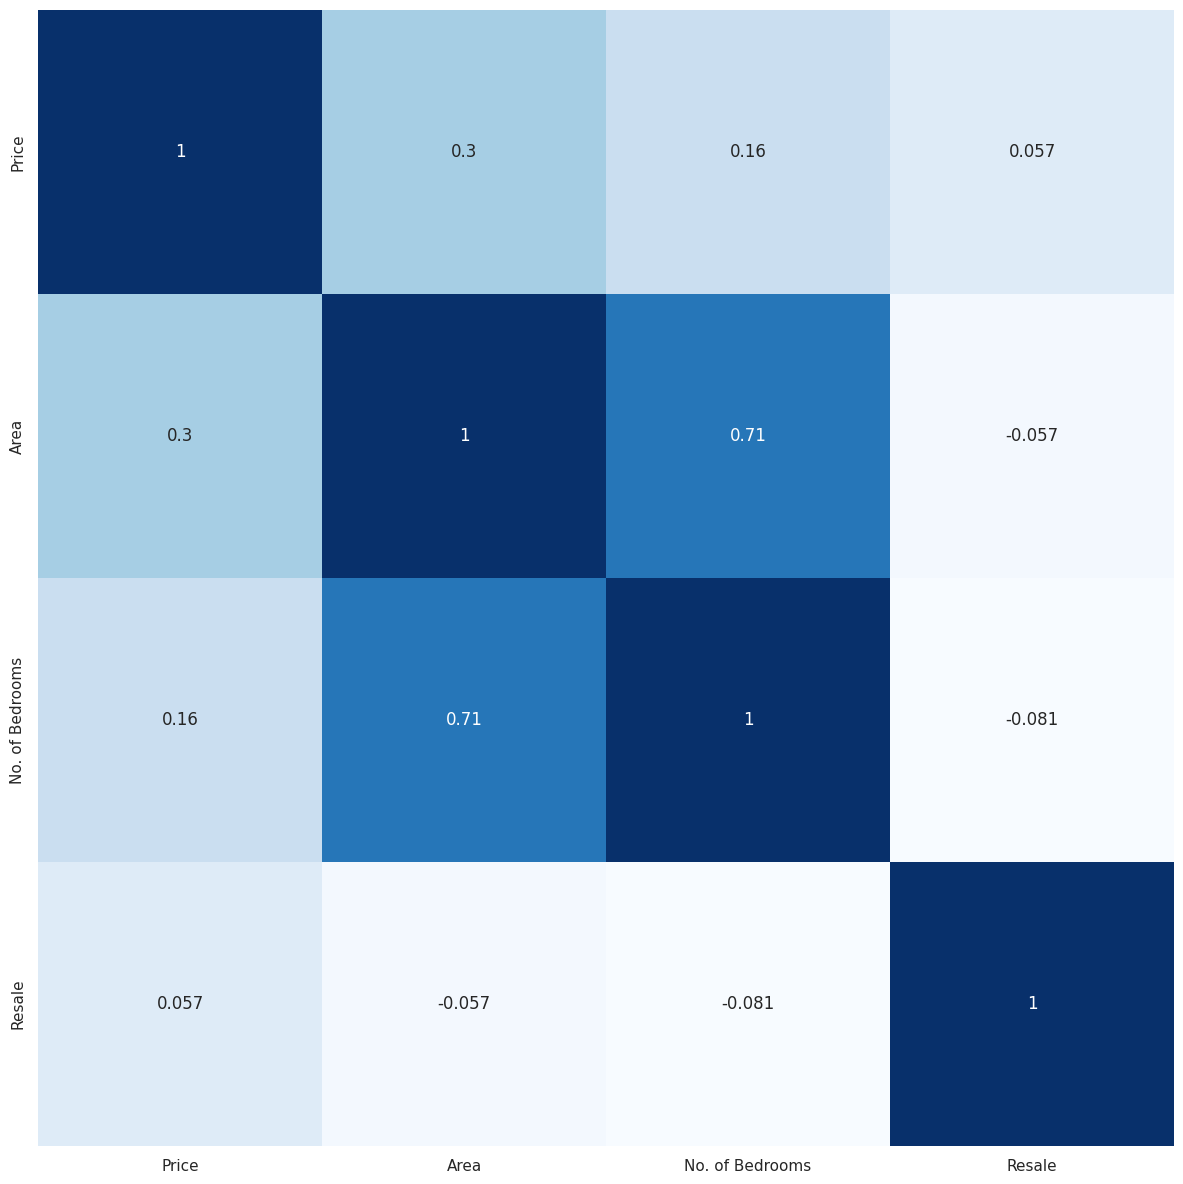

In [327]:
corr_mat = data=essential.corr()
print(corr_mat)
sns.heatmap(corr_mat, annot=True, cmap='Blues',square=True, cbar=False)


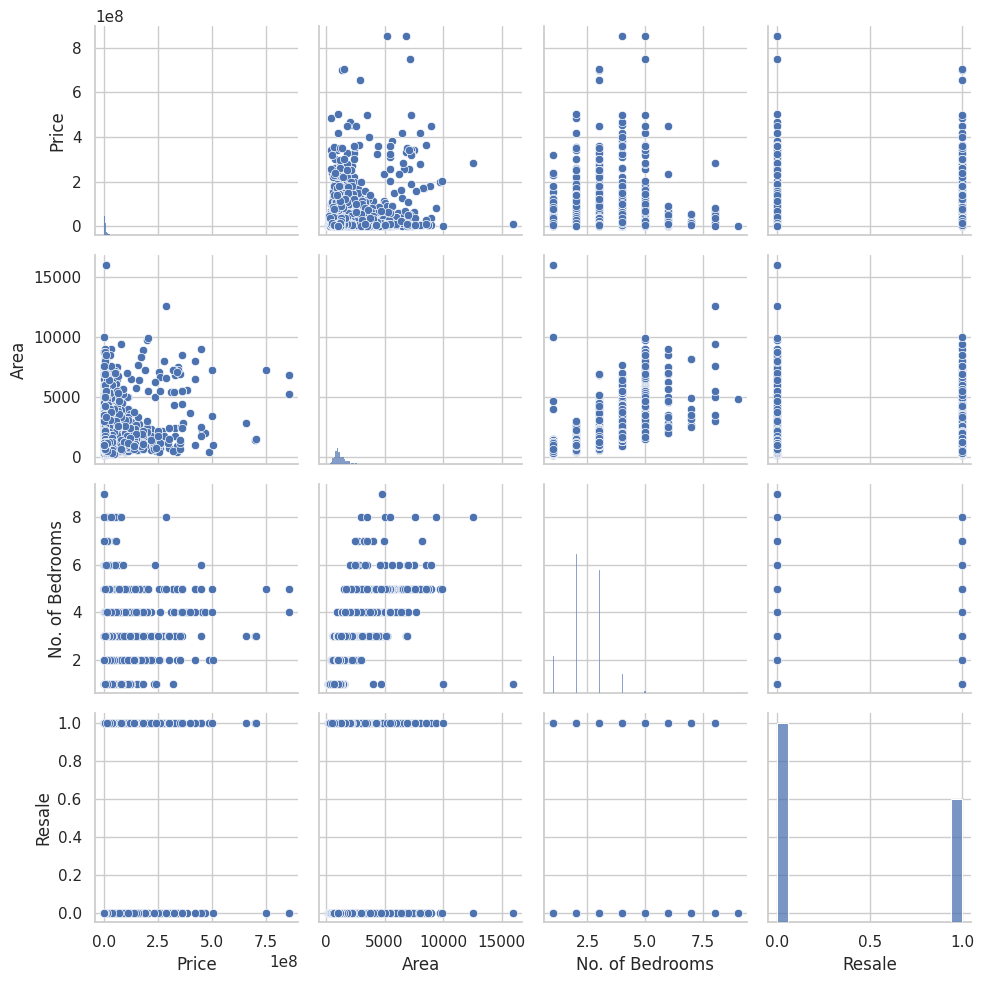

In [328]:

sns.pairplot(data=essential)

<Axes: xlabel='Price', ylabel='Count'>

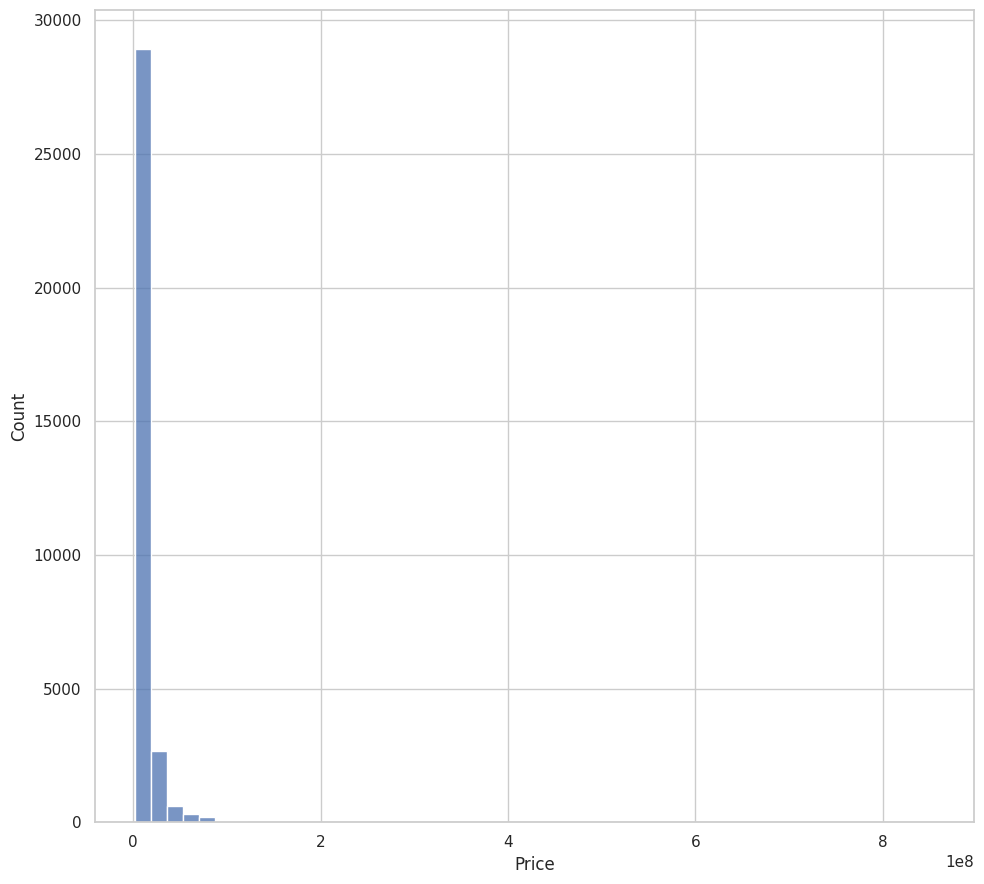

In [329]:
plt.figure(figsize=(10, 9))
sns.histplot(housing['Price'], bins=50)

In [330]:
skewness = housing['Price'].skew()
kurtosis = housing['Price'].kurtosis()
print(skewness)
print(kurtosis)


14.009375179304143
315.32789959370643


## Conclusion:
Skewness refers to whether the data is skewed to larger or smaller values and kurtosis indicates the propensity of the data to have extreme values.
skewness > 0: The distribution is right-skewed,most of the data is concentrated towards the left.

Kurtosis > 0: The distribution more outliers than a normal distribution.

## Hypothesis Testing

In [331]:
# Split the data into two groups based on city
group1 = df[df['City'] == 'Delhi']['Price']
group2 = df[df['City'] == 'Mumbai']['Price']

# Perform two-sample t-test
t_stat, p_value = ttest_ind(group1, group2)

print("t-statistic:", t_stat)
print("p-value:", p_value)


KeyError: 'Price'

## Conclusion:
Null hypothesis (H0): There is no significant difference in the mean Prices between the "Delhi" and "Mumbai".

Alternative hypothesis (H1): There is a significant difference in the mean Price between the "Delhi" and "Mumbai" load types.

With a p-value < 0.05, we would reject the null hypothesis (H0) and accept the alternative hypothesis (H1).
This implies that the "Mumbai" and "Delhi" have no significant difference in mean Prices.


In [ ]:
# Split the data into two groups based on city
group1 = df[df['City'] == 'Bangalore']['Price']
group2 = df[df['City'] == 'Kolkata']['Price']

# Perform two-sample t-test
t_stat, p_value = ttest_ind(group1, group2)

print("t-statistic:", t_stat)
print("p-value:", p_value)


## Conclusion:

Null hypothesis (H0): There is no significant difference in the mean Prices between the "Bangalore" and "Kolkata".

Alternative hypothesis (H1): There is a significant difference in the mean Price between the "Bangalore" and "Kolkata" load types.

With a p-value < 0.05, we would reject the null hypothesis (H0) and accept the alternative hypothesis (H1). 
This implies that the "Bangalore" and "Kolkata" have significant difference in their mean Prices.


## Anova

In [ ]:
# Sample data for three groups
Mumbai = df[df['City'] == 'Mumbai']['Price']
Kolkata = df[df['City'] == 'Kolkata']['Price']
Bangalore = df[df['City'] == 'Bangalore']['Price']
Delhi = df[df['City'] == 'Delhi']['Price']


# Perform one-way ANOVA
f_statistic, p_value = f_oneway(Mumbai, Kolkata, Bangalore, Delhi)

# Print the results
print("F-Statistic:", f_statistic)
print("P-Value:", p_value)

## Conclusion:
Null hypothesis (H0): There is no significant impact citywise location of the house on the price.
Alternative hypothesis (H1): There is a significant impact of citywise location of houses on the price.

p-value < 0.05 indicates there is a significant impact of citywise location of houses on the price.


## Machine Learning

In [ ]:
lr = LinearRegression()
X = housing[['Area']]
y = housing['Price']

In [ ]:
kfold = KFold(n_splits=5, shuffle=True, random_state=True)

In [ ]:
lr = LinearRegression()
param = {
    'fit_intercept': [True, False],
}
poly = PolynomialFeatures(degree=5)
X_poly = poly.fit_transform(X)
gcv = GridSearchCV(lr, param_grid=param, cv=kfold, scoring='neg_mean_absolute_error')
gcv.fit(X_poly,y)
print(gcv.best_params_)
print(gcv.best_score_)


In [ ]:
housing['Price'].mean()

In [ ]:
dtr = DecisionTreeRegressor()
param = {
    'max_depth': [None,2,3,4,5],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'min_samples_split': [2, 3, 4, 5]
}
poly = PolynomialFeatures(degree=5)
X_poly = poly.fit_transform(X)
gcv = GridSearchCV(dtr, param_grid=param,verbose=3, cv=kfold, scoring='neg_mean_absolute_error')
gcv.fit(X_poly,y)
print(gcv.best_params_)
print(gcv.best_score_)